<a href="https://colab.research.google.com/github/JALVARADORUIZ/TFM_UB/blob/main/TFM%20_%20CNN%20_%20variedad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [13]:
import numpy as np 
import pandas as pd
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.svm import SVC

from tqdm import tqdm
tqdm.pandas()


dim = 100

In [14]:
data = '/content/drive/MyDrive/TFM_Máster BDDS/datawine/df_img_processed2.csv'
df = pd.read_csv(data)

In [4]:
df.columns[0:15]

Index(['winery', 'product', 'region', 'country_code', 'rating', 'variety',
       'price_usd', 'image', 'continente', 'country_code_clean', 'price_cat',
       'rating_cat', 'quality', 'color', 'image_clean'],
      dtype='object')

In [ ]:
'''
def getFeatures(files):
    images = []
    path = "/content/drive/MyDrive/TFM_Máster BDDS/datawine/vintage-images/"
    for f in enumerate(files):
        #print(f[1])
        image_path = path + f[1]
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (dim, dim))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        images.append(image)
    return images

X = getFeatures(df['image_clean'])

'''

In [ ]:
'''
with open('/content/drive/MyDrive/TFM_Máster BDDS/100_features.npy', 'wb') as f:
    np.save(f, X)
'''

In [15]:
with open('/content/drive/MyDrive/TFM_Máster BDDS/100_features.npy', 'rb') as f:
    X= np.load(f)

In [16]:
X = np.array(X)
X.shape

(9878, 100, 100, 3)

In [17]:
df_variety = df['variety'].value_counts().rename_axis('variety').to_frame('counts')
df_variety_selected = df_variety[:15]
list_variety = list(df_variety_selected.index)

def transform_variety(variety, list_variety):
  if variety in list_variety:
    return variety
  else:
    return "other"

df['variety'] = df.progress_apply(lambda x:transform_variety(x.variety,list_variety), axis=1)

le = LabelEncoder()
variedad = le.fit_transform(df['variety'])
y = np.array(variedad)

100%|██████████| 9878/9878 [00:02<00:00, 4405.16it/s]


In [18]:
y.shape

(9878,)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [20]:
# Normalize pixel values between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

**Probando Red neuronal Convulsional Simple (Sin Dropout)**

In [21]:
# We import the data set from tensorflow and build the model there
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(16))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 28224)            

In [22]:
model.compile(optimizer='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, 
                    validation_data=(X_test, y_test))

Epoch 1/50
217/217 [==============================] - 4s 17ms/step - loss: 2.2045 - accuracy: 0.3163 - val_loss: 2.0433 - val_accuracy: 0.3613
Epoch 2/50
217/217 [==============================] - 3s 15ms/step - loss: 1.9060 - accuracy: 0.3915 - val_loss: 1.8984 - val_accuracy: 0.4133
Epoch 3/50
217/217 [==============================] - 3s 15ms/step - loss: 1.7096 - accuracy: 0.4520 - val_loss: 1.8783 - val_accuracy: 0.4271
Epoch 4/50
217/217 [==============================] - 3s 15ms/step - loss: 1.4826 - accuracy: 0.5237 - val_loss: 1.7890 - val_accuracy: 0.4794
Epoch 5/50
217/217 [==============================] - 3s 15ms/step - loss: 1.1551 - accuracy: 0.6213 - val_loss: 1.9259 - val_accuracy: 0.4926
Epoch 6/50
217/217 [==============================] - 3s 15ms/step - loss: 0.8165 - accuracy: 0.7362 - val_loss: 2.1034 - val_accuracy: 0.4781
Epoch 7/50
217/217 [==============================] - 3s 15ms/step - loss: 0.5324 - accuracy: 0.8283 - val_loss: 2.4668 - val_accuracy: 0.4865

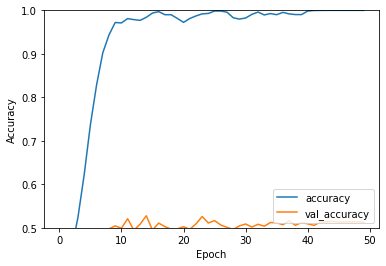

In [23]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

**Red Neuronal Convulsional con Dropout**

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from keras.regularizers import l1_l2

model = Sequential()

#### Input Layer ####
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',
                 activation='relu', input_shape=(100, 100, 3)))

#### Convolutional Layers ####
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))  # Pooling
model.add(Dropout(0.2)) # Dropout

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512, (5,5), padding='same', activation='relu'))
model.add(Conv2D(512, (5,5), activation='relu'))
model.add(MaxPooling2D((4,4)))
model.add(Dropout(0.2))

#### Fully-Connected Layer ####
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='softmax'))

model.summary() # a handy way to inspect the architecture

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 conv2d_15 (Conv2D)          (None, 98, 98, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 49, 49, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 49, 49, 64)        18496     
                                                                 
 conv2d_17 (Conv2D)          (None, 47, 47, 64)        36928     
                                                      

In [42]:
model.compile(optimizer=RMSprop(learning_rate=0.0001), 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, 
                    validation_data=(X_test, y_test))

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


217/217 [==============================] - 17s 65ms/step - loss: 0.2917 - accuracy: 0.8959 - val_loss: 3.1318 - val_accuracy: 0.5057
Epoch 2/50
217/217 [==============================] - 13s 60ms/step - loss: 0.2249 - accuracy: 0.9207 - val_loss: 3.4067 - val_accuracy: 0.5101
Epoch 3/50
217/217 [==============================] - 13s 61ms/step - loss: 0.2154 - accuracy: 0.9232 - val_loss: 3.5194 - val_accuracy: 0.5091
Epoch 4/50
217/217 [==============================] - 13s 61ms/step - loss: 0.1993 - accuracy: 0.9277 - val_loss: 3.6269 - val_accuracy: 0.5057
Epoch 5/50
217/217 [==============================] - 13s 61ms/step - loss: 0.1943 - accuracy: 0.9323 - val_loss: 3.7540 - val_accuracy: 0.5105
Epoch 6/50
217/217 [==============================] - 13s 62ms/step - loss: 0.1880 - accuracy: 0.9349 - val_loss: 3.7367 - val_accuracy: 0.5101
Epoch 7/50
217/217 [==============================] - 13s 61ms/step - loss: 0.1902 - accuracy: 0.9358 - val_loss: 3.8282 - val_accuracy: 0.5081
Epo

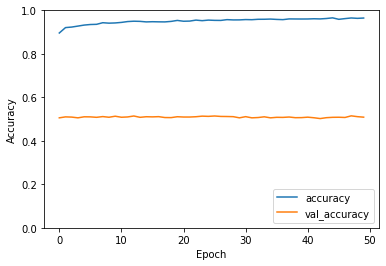

In [43]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [ ]:
%%time

from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from livelossplot import PlotLossesKeras
from livelossplot.keras import PlotLossesCallback
'''
BATCH_SIZE = 32
steps_per_epoch = X_train.shape[0] // BATCH_SIZE
val_steps = y_train.shape[0] // BATCH_SIZE
'''
n_epochs = 50

optimizer = RMSprop(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Saves Keras model after each epoch
checkpointer = ModelCheckpoint(filepath='img_model.weights.best.hdf5', 
                               verbose=1, 
                               save_best_only=True)

# Early stopping to prevent overtraining and to ensure decreasing validation loss
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

# tensorboard_callback = TensorBoard(log_dir="./logs")

# Actual fitting of the model
history = model.fit(X_train,
                    y_train,
                    epochs=n_epochs, 
                    #steps_per_epoch=steps_per_epoch,
                    validation_data=(X_test, y_test),
                    #validation_steps=val_steps,
                    callbacks=[early_stop, checkpointer, PlotLossesKeras()],
                    verbose=False)

In [ ]:
import joblib

joblib.dump(classifier_svc_pca, '/content/drive/MyDrive/TFM_Máster BDDS/Modelos/modelo_CNN_variedad_features100.pkl')

['/content/drive/MyDrive/TFM_Máster BDDS/Modelos/modelo_svm_variedad_features100.pkl']